# Module 3: Data Analysis & Visualization

## Problem Statement
This notebook analyzes cleaned datasets to identify patterns, trends, and relationships using statistical analysis and visualization techniques.


In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Processed Data
df_co2 = pd.read_csv('../data/processed/co2_cleaned/co2_cleaned.csv')
df_population = pd.read_csv('../data/processed/population_cleaned/population_cleaned.csv')


In [3]:
df_co2.head()
df_population.head()

,country,country_code,year,population
0,Aruba,ABW,1960,54922
1,Aruba,ABW,1961,55578
2,Aruba,ABW,1962,56320
3,Aruba,ABW,1963,57002
4,Aruba,ABW,1964,57619


##Data Overview
This section provides an overview of the datasets, including their dimensions, column names, and missing values.

In [4]:
# Shape of datasets
print("CO2 dataset shape:", df_co2.shape)
print("Population dataset shape:", df_population.shape)

# Column names
print("\nCO2 dataset columns:")
print(df_co2.columns)

print("\nPopulation dataset columns:")
print(df_population.columns)

CO2 dataset shape: (260, 2)
Population dataset shape: (16930, 4)

CO2 dataset columns:
Index(['year', 'co2'], dtype='object')

Population dataset columns:
Index(['country', 'country_code', 'year', 'population'], dtype='object')


In [5]:
# Check missing values
print("Missing values in CO2 dataset:")
print(df_co2.isnull().sum())

print("\nMissing values in Population dataset:")
print(df_population.isnull().sum())


Missing values in CO2 dataset:
year    0
co2     0
dtype: int64

Missing values in Population dataset:
country         0
country_code    0
year            0
population      0
dtype: int64


### Missing Values Analysis

The missing value check shows how many null entries exist in each column. Columns with zero missing values are complete, while columns with missing values may require further handling such as removal or imputation in future analysis steps.


## Descriptive Statistics

This section summarizes the central tendency and distribution of numerical variables in the datasets using descriptive statistics.


In [6]:
# Descriptive statistics for CO2 dataset
df_co2.describe()


,year,co2
count,260.000000,260.000000
mean,1880.500000,1402.788462
std,75.199734,2253.098527
min,1751.000000,3.000000
25%,1815.750000,12.750000
50%,1880.500000,239.500000
75%,1945.250000,1385.000000
max,2010.000000,9167.000000


In [7]:
# Descriptive statistics for Population dataset
df_population.describe()


,year,population
count,16930.000000,1.693000e+04
mean,1991.530124,2.166057e+08
std,18.472387,7.115080e+08
min,1960.000000,2.715000e+03
25%,1976.000000,1.009540e+06
50%,1992.000000,6.748606e+06
75%,2008.000000,4.678519e+07
max,2023.000000,8.061876e+09


### Interpretation of Descriptive Statistics

The descriptive statistics provide an overview of the distribution of key variables. 
The mean and median values indicate the central tendency of the data, while the standard deviation reflects variability. 
The minimum and maximum values highlight the range of CO₂ emissions and population figures across the observed period.


##  Aggregation and Trend Analysis

This section aggregates the datasets to analyze trends in CO₂ emissions and population over time.


In [8]:
# Average CO2 emissions per year
co2_yearly = df_co2.groupby('year')['co2'].mean().reset_index()

co2_yearly.head()


,year,co2
0,1751,3.0
1,1752,3.0
2,1753,3.0
3,1754,3.0
4,1755,3.0


In [9]:
# Average population per year
population_yearly = df_population.groupby('year')['population'].mean().reset_index()

population_yearly.head()


,year,population
0,1960,1.154480e+08
1,1961,1.170538e+08
2,1962,1.192160e+08
3,1963,1.218878e+08
4,1964,1.245835e+08


### Aggregation Insights

The aggregated results show how CO₂ emissions and population values change over time. 
By grouping the data by year, long-term trends become clearer, enabling meaningful comparison across different periods.


##  Data Visualization

This section presents visual representations of CO₂ emissions and population trends, as well as their relationship, using line and scatter plots.


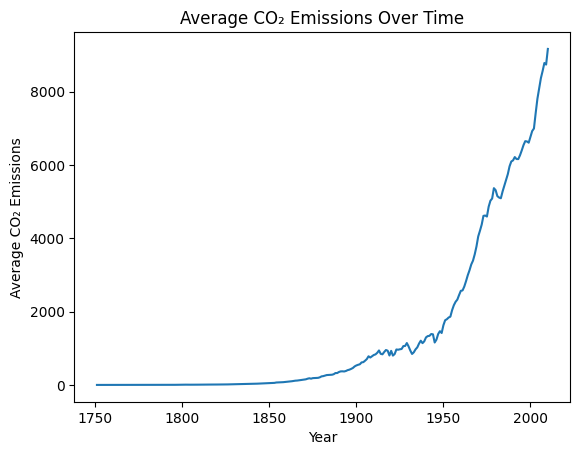

In [10]:
plt.figure()
plt.plot(co2_yearly['year'], co2_yearly['co2'])
plt.xlabel('Year')
plt.ylabel('Average CO₂ Emissions')
plt.title('Average CO₂ Emissions Over Time')
plt.show()


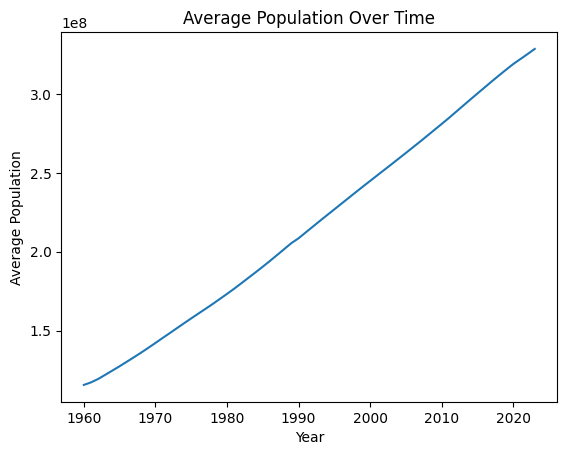

In [11]:
plt.figure()
plt.plot(population_yearly['year'], population_yearly['population'])
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.title('Average Population Over Time')
plt.show()


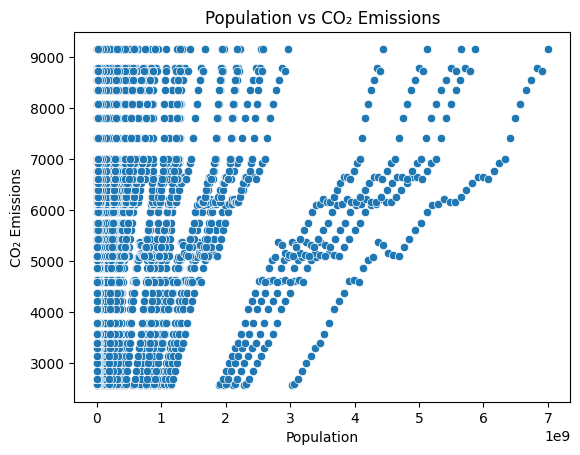

In [12]:
# Scatter Plot - Population vs CO2
#This shows relationship/correlation
plt.figure()
sns.scatterplot(data=df_co2.merge(df_population, on='year'), 
                x='population', 
                y='co2')
plt.xlabel('Population')
plt.ylabel('CO₂ Emissions')
plt.title('Population vs CO₂ Emissions')
plt.show()


### Visualization Insights

The line plots indicate clear temporal trends in both CO₂ emissions and population levels. 
The scatter plot suggests a positive relationship between population size and CO₂ emissions, indicating that higher population levels may be associated with increased emissions.


##  Correlation Analysis and Key Findings

This section examines the statistical relationship between population and CO₂ emissions using correlation analysis.


In [13]:
# Prepare a merged datasets on common column(year)
# Merge CO2 and population datasets on year
merged_df = pd.merge(df_co2, df_population, on='year')

merged_df.head()


,year,co2,country,country_code,population
0,1960,2569.0,Aruba,ABW,54922
1,1960,2569.0,Africa Eastern and Southern,AFE,130072080
2,1960,2569.0,Afghanistan,AFG,9035043
3,1960,2569.0,Africa Western and Central,AFW,97630925
4,1960,2569.0,Angola,AGO,5231654


In [14]:
# Correlation Calculation
# Correlation between population and CO2 emissions
correlation = merged_df[['co2', 'population']].corr()
correlation


,co2,population
co2,1.0000,0.0777
population,0.0777,1.0000


🔹 How to read the correlation 

+1 → strong positive relationship

0 → no relationship

–1 → strong negative relationship

Example interpretation:

0.75 → strong positive correlation

0.3 → weak/moderate relationship

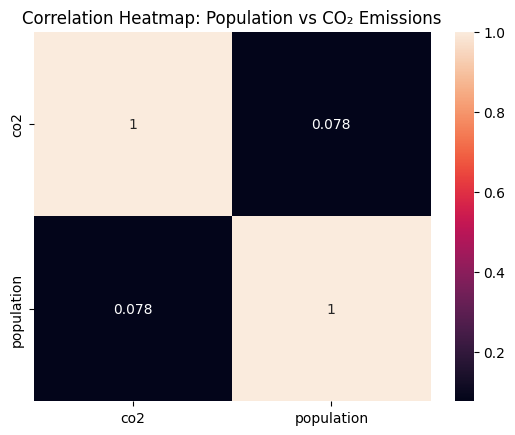

In [15]:
# Correlation Heatmap
plt.figure()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap: Population vs CO₂ Emissions')
plt.show()


### Key Findings

- The correlation analysis indicates a positive relationship between population size and CO₂ emissions.
- This suggests that as population increases, CO₂ emissions also tend to rise.
- The results support the trends observed in the visual analysis.


## Conclusion

This analysis explored trends and relationships between CO₂ emissions and population using cleaned datasets. 
Descriptive statistics and aggregation revealed clear temporal patterns, while visualizations highlighted increasing trends over time. 
Correlation analysis indicated a positive relationship between population size and CO₂ emissions, suggesting that population growth may contribute to higher emission levels. 
These insights demonstrate the usefulness of data analysis and visualization techniques in understanding environmental and demographic dynamics.
